<a href="https://colab.research.google.com/github/shrutimahato/Stress-Detection-System-Using-ML/blob/main/stressD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC

In [ ]:
train = pd.read_csv('stress.csv')
train.shape

(2838, 116)

In [ ]:
test = pd.read_csv('stress-test.csv')
test.shape

(715, 116)

In [ ]:
full = pd.concat((train, test), sort=False).reset_index(drop=True)

In [ ]:
df = full[['text','subreddit']].copy()
df.head()

text         subreddit
0  He said he had not felt that way before, sugge...              ptsd
1  Hey there r/assistance, Not sure if this is th...        assistance
2  My mom then hit me with the newspaper and it s...              ptsd
3  until i met my new boyfriend, he is amazing, h...     relationships
4  October is Domestic Violence Awareness Month a...  survivorsofabuse

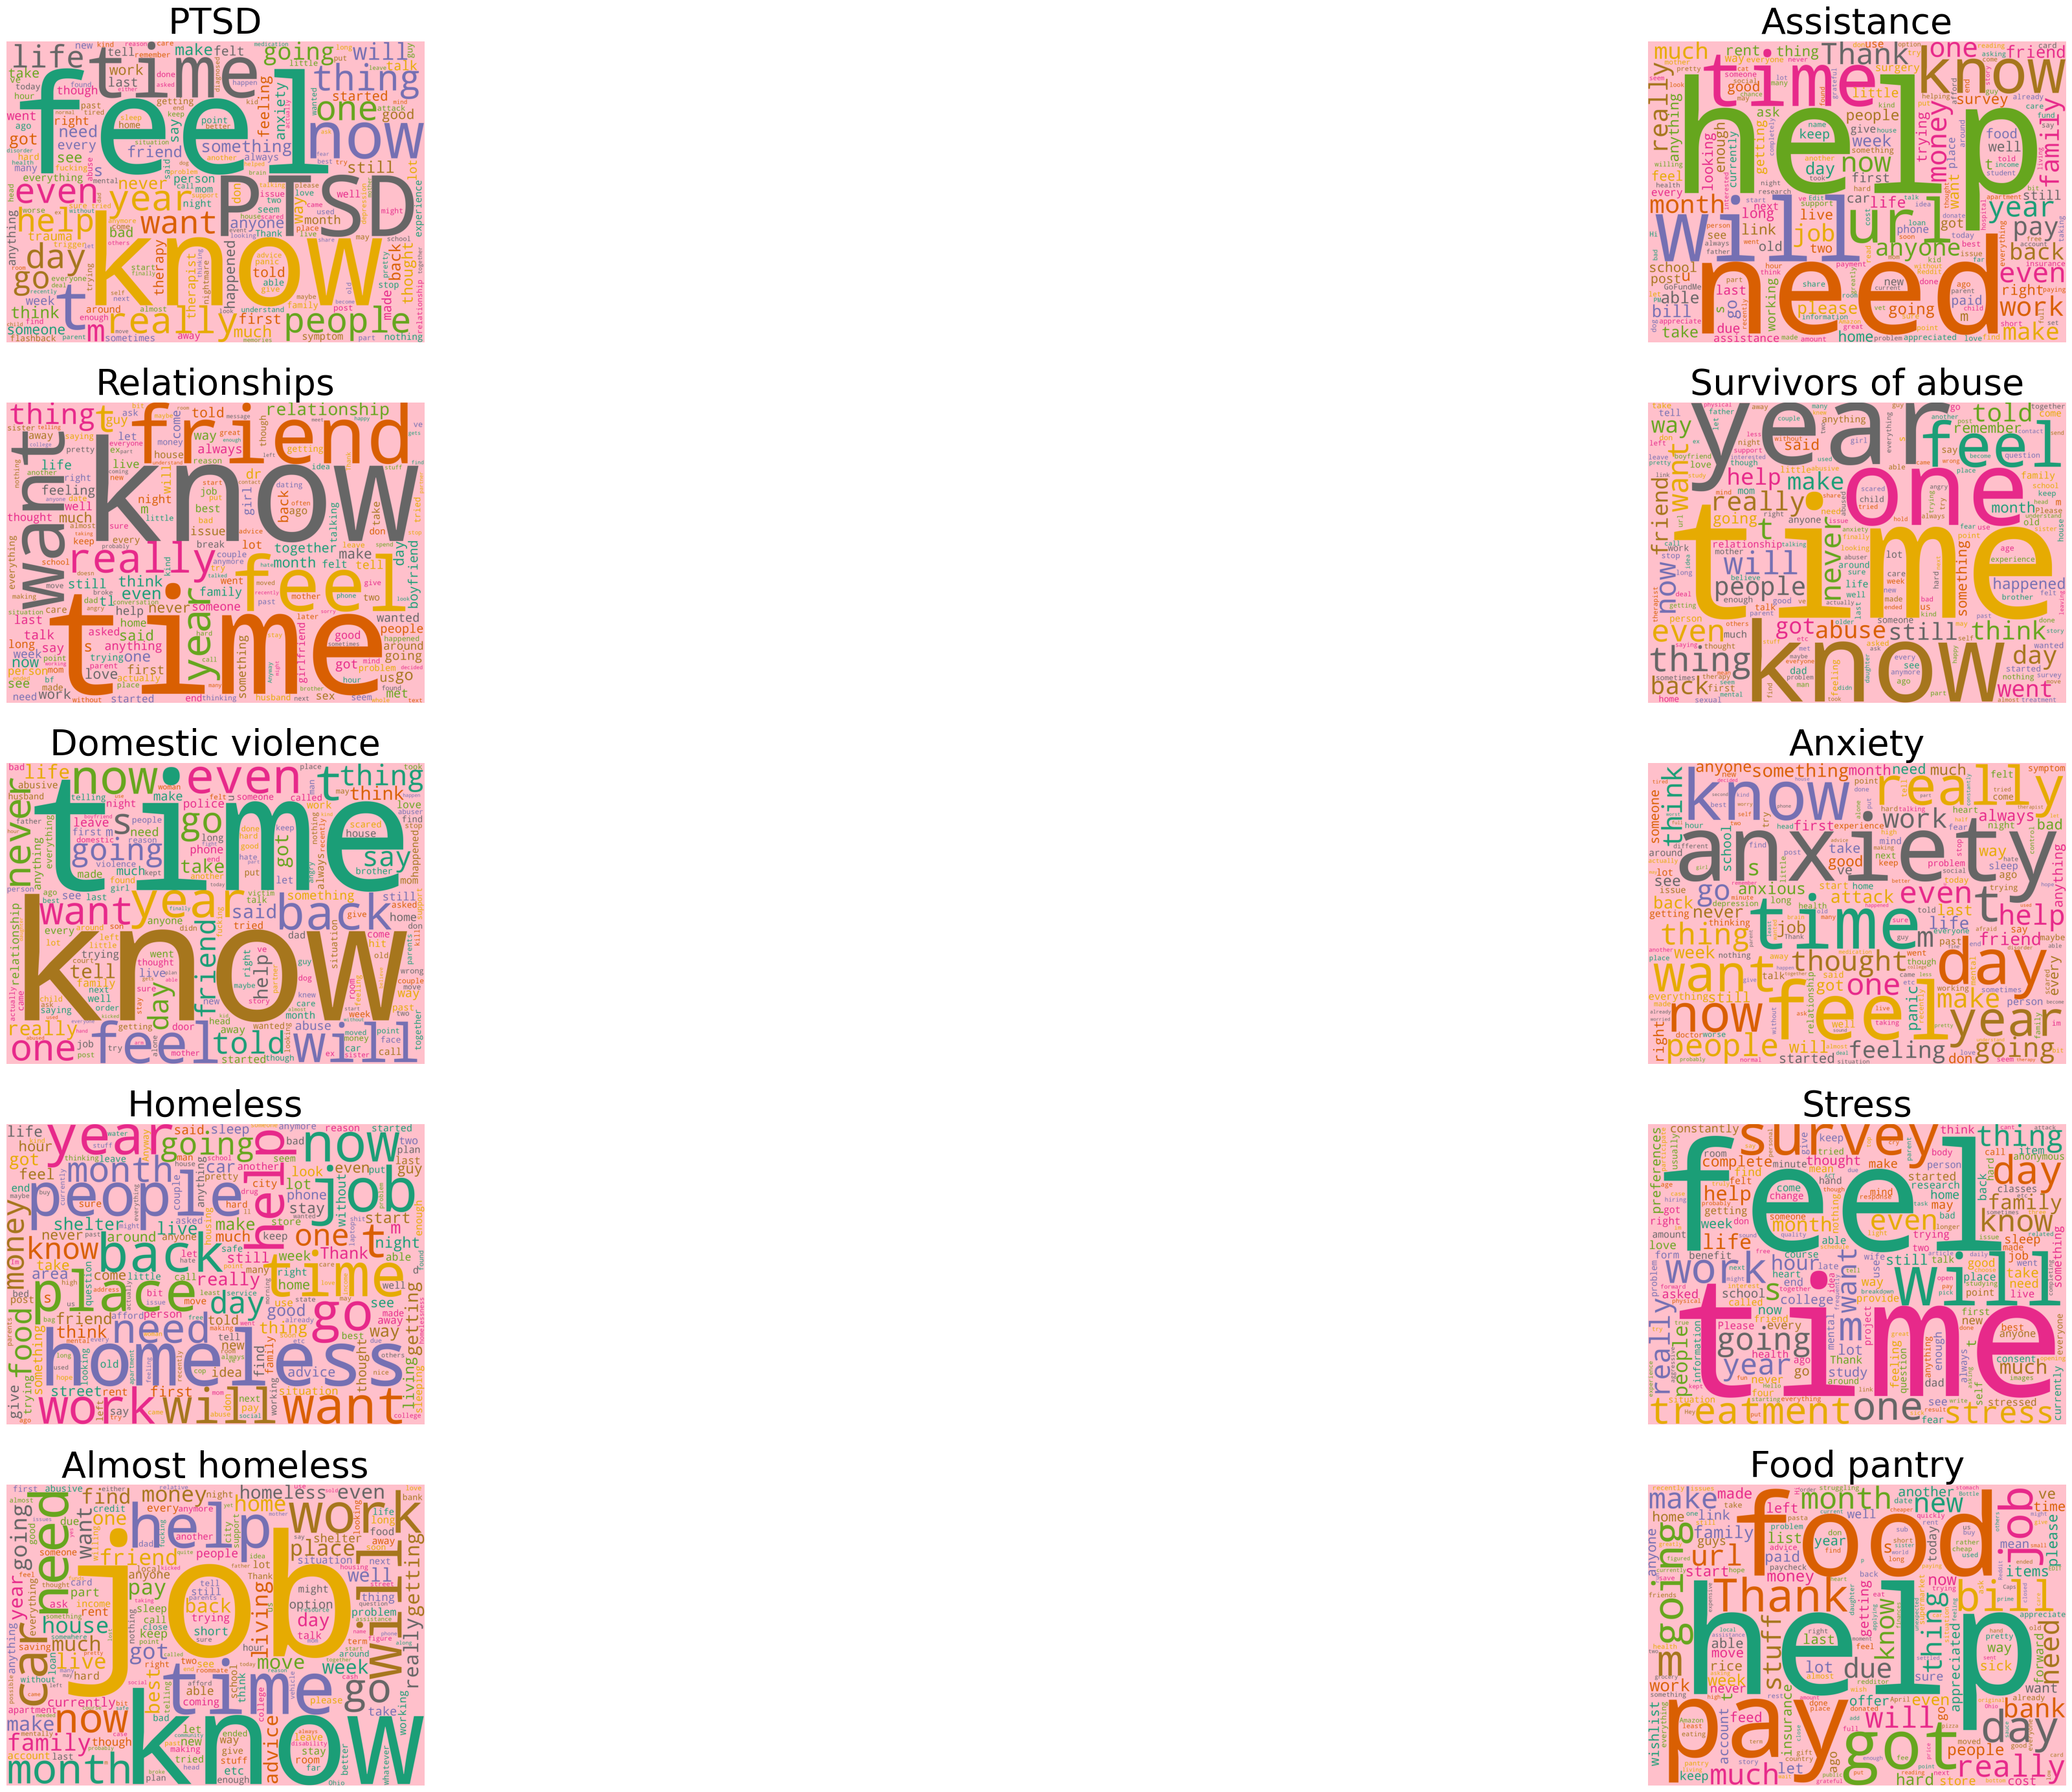

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(60,35))
subset = df[df['subreddit']=='ptsd']
text = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5,2,1)
plt.axis('off')
plt.title("PTSD",fontsize=40)
plt.imshow(cloud1)

subset = df[df['subreddit']=='assistance']
text = subset.text.values
cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,2)
plt.axis('off')
plt.title("Assistance",fontsize=40)
plt.imshow(cloud2)

subset = df[df['subreddit']=='relationships']
text = subset.text.values
cloud3=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,3)
plt.axis('off')
plt.title("Relationships",fontsize=40)
plt.imshow(cloud3)

subset = df[df['subreddit']=='survivorsofabuse']
text = subset.text.values
cloud4=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,4)
plt.axis('off')
plt.title("Survivors of abuse",fontsize=40)
plt.imshow(cloud4)

subset = df[df['subreddit']=='domesticviolence']
text = subset.text.values
cloud5=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,5)
plt.axis('off')
plt.title("Domestic violence",fontsize=40)
plt.imshow(cloud5)

subset = df[df['subreddit']=='anxiety']
text = subset.text.values
cloud6=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,6)
plt.axis('off')
plt.title("Anxiety",fontsize=40)
plt.imshow(cloud6)

subset = df[df['subreddit']=='homeless']
text = subset.text.values
cloud7=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,7)
plt.axis('off')
plt.title("Homeless",fontsize=40)
plt.imshow(cloud7)

subset = df[df['subreddit']=='stress']
text = subset.text.values
cloud8=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,8)
plt.axis('off')
plt.title("Stress",fontsize=40)
plt.imshow(cloud8)

subset = df[df['subreddit']=='almosthomeless']
text = subset.text.values
cloud9=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,9)
plt.axis('off')
plt.title("Almost homeless",fontsize=40)
plt.imshow(cloud9)

subset = df[df['subreddit']=='food_pantry']
text = subset.text.values
cloud10=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,10)
plt.axis('off')
plt.title("Food pantry",fontsize=40)
plt.imshow(cloud10)

In [ ]:
import csv

# Open the CSV file in read mode
with open('stress.csv', newline='') as csvfile:
    # Create a CSV reader object
    reader = csv.reader(csvfile)

    # Read the first row
    first_row = next(reader)

    # Print the first row
    print(first_row)

['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label', 'confidence', 'social_timestamp', 'social_karma', 'syntax_ari', 'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj', 'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj', 'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number', 'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family', 'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male', 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain', 'lex_liwc_differ', 'lex_liwc_

In [ ]:
full = pd.concat((train, test), sort=False).reset_index(drop=True)
df = full[['text','subreddit']].copy()
df.head()

text         subreddit
0  He said he had not felt that way before, sugge...              ptsd
1  Hey there r/assistance, Not sure if this is th...        assistance
2  My mom then hit me with the newspaper and it s...              ptsd
3  until i met my new boyfriend, he is amazing, h...     relationships
4  October is Domestic Violence Awareness Month a...  survivorsofabuse

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import punctuation

stop = set(stopwords.words('english'))
import re

def lower(text):
    return text.lower()

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def clean_text(text):
    text = lower(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    return text

#Apply function on column
df['clean_text']=df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from collections import Counter
cnt=Counter()

for text in df['clean_text'].values:
    for word in text.split():
        cnt[word]+=1

cnt.most_common(10)

[('im', 1716),
 ('like', 1503),
 ('get', 1083),
 ('know', 1052),
 ('feel', 966),
 ('time', 947),
 ('would', 943),
 ('me', 855),
 ('really', 813),
 ('even', 752)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["clean_text"] = df["clean_text"].apply(lambda text: remove_freqwords(text))

In [ ]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

df['clean_text']=df['clean_text'].apply(lambda text: lemmatizer_words(text))

In [ ]:
df.head()

text         subreddit  \
0  He said he had not felt that way before, sugge...              ptsd   
1  Hey there r/assistance, Not sure if this is th...        assistance   
2  My mom then hit me with the newspaper and it s...              ptsd   
3  until i met my new boyfriend, he is amazing, h...     relationships   
4  October is Domestic Violence Awareness Month a...  survivorsofabuse   

                                          clean_text  
0  said felt way before suggeted go rest trigger ...  
1  hey rassistance sure right place post this go ...  
2  mom hit newspaper shocked this know play hitti...  
3  met new boyfriend amazing kind sweet good stud...  
4  october domestic violence awareness month dome...

In [ ]:
from textblob import TextBlob
#Positive Sentiment
print("Positive Sentiment :")
print("Polarity : ",TextBlob("greatest").polarity)
print("Sentiment : ",TextBlob("greatest").sentiment)
print()
#Negative Sentiment
print("Negative Sentiment :")
print("Polarity : ",TextBlob("worst").polarity)
print("Sentiment : ",TextBlob("worst").sentiment)

Positive Sentiment :
Polarity :  1.0
Sentiment :  Sentiment(polarity=1.0, subjectivity=1.0)

Negative Sentiment :
Polarity :  -1.0
Sentiment :  Sentiment(polarity=-1.0, subjectivity=1.0)


In [ ]:
#Sentiment Detection
def mood(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:

posts = full[["text"]]

In [ ]:
#Adding Mood Detection as column
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

<ipython-input-22-6fb75e8240a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["sentiment"] = posts["text"].apply(mood)


text  sentiment
0  He said he had not felt that way before, sugge...  -0.002742
1  Hey there r/assistance, Not sure if this is th...   0.292857
2  My mom then hit me with the newspaper and it s...   0.011894
3  until i met my new boyfriend, he is amazing, h...   0.141671
4  October is Domestic Violence Awareness Month a...  -0.204167

In [ ]:
print("Value Exploration :")
print("Minimum Sentiment :", posts["sentiment"].min())
print("Maximum Sentiment :", posts["sentiment"].max())
print()
print("Counts :")
print(posts.sentiment.value_counts())

Value Exploration :
Minimum Sentiment : -1.0
Maximum Sentiment : 1.0

Counts :
sentiment
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: count, Length: 2627, dtype: int64


In [ ]:
#Adding meaning to text from og dataset
posts["meaning"] = full["label"].map({0:"Unstressed", 1:"Stressed"})
#posts = posts[["text", "meaning"]]
posts.head()

<ipython-input-24-e68a1bf494f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["meaning"] = full["label"].map({0:"Unstressed", 1:"Stressed"})


text  sentiment     meaning
0  He said he had not felt that way before, sugge...  -0.002742    Stressed
1  Hey there r/assistance, Not sure if this is th...   0.292857  Unstressed
2  My mom then hit me with the newspaper and it s...   0.011894    Stressed
3  until i met my new boyfriend, he is amazing, h...   0.141671    Stressed
4  October is Domestic Violence Awareness Month a...  -0.204167    Stressed

In [ ]:
#Applying sentiment
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

<ipython-input-25-4c7d9e2c5033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["sentiment"] = posts["text"].apply(mood)


text  sentiment     meaning
0  He said he had not felt that way before, sugge...  -0.002742    Stressed
1  Hey there r/assistance, Not sure if this is th...   0.292857  Unstressed
2  My mom then hit me with the newspaper and it s...   0.011894    Stressed
3  until i met my new boyfriend, he is amazing, h...   0.141671    Stressed
4  October is Domestic Violence Awareness Month a...  -0.204167    Stressed

<ipython-input-27-a78acfe090cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meaning',data = posts, palette= ["red", "blue"])


<Axes: xlabel='meaning', ylabel='count'>

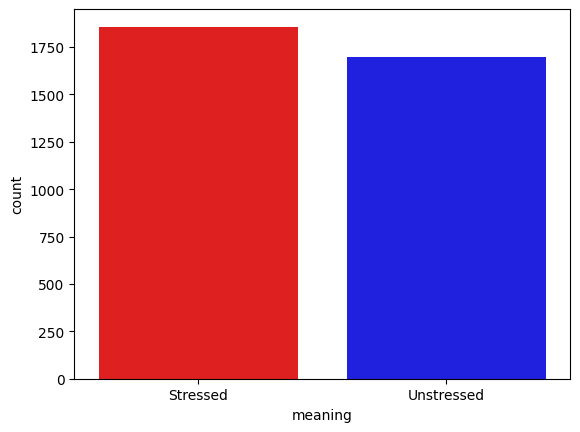

In [ ]:
import seaborn as sns
#sns.displot(x=posts.meaning, kind='kde')
sns.countplot(x='meaning',data = posts, palette= ["red", "blue"])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Read the dataset
train = pd.read_csv("stress.csv")
test = pd.read_csv("stress-test.csv")

# Concatenate the train and test DataFrames
full = pd.concat([train, test])

# Extract features (text) and target (meaning) columns
posts = full[["text", "label"]]
posts["meaning"] = posts["label"].map({0: "Unstressed", 1: "Stressed"})
from sklearn.naive_bayes import BernoulliNB

# Model 1 - Bernoulli Naive Bayes
bnb = BernoulliNB()
m1 = bnb.fit(x_train, y_train)
accuracy_m1 = accuracy_score(m1.predict(x_test), y_test)
print("Bernoulli Naive Bayes Model Accuracy:", round(accuracy_m1 * 100, 2))

# Apply TF-IDF vectorization
tfidf_vect = TfidfVectorizer(stop_words="english")
x_tfidf = tfidf_vect.fit_transform(posts["text"])
y = posts["meaning"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, random_state=43)


# Model 2 - Logistic Regression
lr = LogisticRegression()
m2 = lr.fit(x_train, y_train)
accuracy_m2 = accuracy_score(m2.predict(x_test), y_test)
print("Logistic Regression Model Accuracy:", round(accuracy_m2 * 100, 2))

# Model 3 - Decision Tree
dt = DecisionTreeClassifier()
m3 = dt.fit(x_train, y_train)
accuracy_m3 = accuracy_score(m3.predict(x_test), y_test)
print("Decision Tree Model Accuracy:", round(accuracy_m3 * 100, 2))

<ipython-input-31-c473e9833552>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["meaning"] = posts["label"].map({0: "Unstressed", 1: "Stressed"})


Bernoulli Naive Bayes Model Accuracy: 73.79
Logistic Regression Model Accuracy: 75.14
Decision Tree Model Accuracy: 62.2


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Read the dataset
train = pd.read_csv("stress.csv")
test = pd.read_csv("stress-test.csv")

# Concatenate the train and test DataFrames
full = pd.concat([train, test])

# Extract features (text) and target (meaning) columns
posts = full[["text", "label"]]
posts["meaning"] = posts["label"].map({0: "Unstressed", 1: "Stressed"})

# Apply TF-IDF vectorization
tfidf_vect = TfidfVectorizer(stop_words="english")
x_tfidf = tfidf_vect.fit_transform(posts["text"])
y = posts["meaning"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, random_state=43)

# Model 1 - Bernoulli Naive Bayes
bnb = BernoulliNB()
m1 = bnb.fit(x_train, y_train)
accuracy_m1 = accuracy_score(m1.predict(x_test), y_test)
print("Bernoulli Naive Bayes Model Accuracy:", round(accuracy_m1 * 100, 2))

# Model 2 - K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
m2 = knn.fit(x_train, y_train)
accuracy_m2 = accuracy_score(m2.predict(x_test), y_test)
print("K-Nearest Neighbors (KNN) Model Accuracy:", round(accuracy_m2 * 100, 2))

# Model 3 - Support Vector Machine (SVM)
svm = SVC()
m3 = svm.fit(x_train, y_train)
accuracy_m3 = accuracy_score(m3.predict(x_test), y_test)
print("Support Vector Machine (SVM) Model Accuracy:", round(accuracy_m3 * 100, 2))

# Model 4 - Decision Tree
dt = DecisionTreeClassifier()
m4 = dt.fit(x_train, y_train)
accuracy_m4 = accuracy_score(m4.predict(x_test), y_test)
print("Decision Tree Model Accuracy:", round(accuracy_m4 * 100, 2))

# Model 5 - Random Forest
rf = RandomForestClassifier()
m5 = rf.fit(x_train, y_train)
accuracy_m5 = accuracy_score(m5.predict(x_test), y_test)
print("Random Forest Model Accuracy:", round(accuracy_m5 * 100, 2))


<ipython-input-40-47e58f6e19dc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts["meaning"] = posts["label"].map({0: "Unstressed", 1: "Stressed"})


Bernoulli Naive Bayes Model Accuracy: 73.79
K-Nearest Neighbors (KNN) Model Accuracy: 61.19
Support Vector Machine (SVM) Model Accuracy: 75.03
Decision Tree Model Accuracy: 61.64
Random Forest Model Accuracy: 72.78
['Unstressed']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Read the dataset
train = pd.read_csv("stress.csv")
test = pd.read_csv("stress-test.csv")

# Concatenate the train and test DataFrames
full = pd.concat([train, test])

# Extract features (text) and target (meaning) columns
posts = full[["text", "label"]]
posts.loc[:, "meaning"] = posts["label"].map({0: "Unstressed", 1: "Stressed"})

# Apply TF-IDF vectorization
tfidf_vect = TfidfVectorizer(stop_words="english")
x_tfidf = tfidf_vect.fit_transform(posts["text"])
y = posts["meaning"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, random_state=43)

# Model 1 - Bernoulli Naive Bayes
bnb = BernoulliNB()
m1 = bnb.fit(x_train, y_train)
accuracy_m1 = accuracy_score(m1.predict(x_test), y_test)
print("Bernoulli Naive Bayes Model Accuracy:", round(accuracy_m1 * 100, 2))

# Model 2 - K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
m2 = knn.fit(x_train, y_train)
accuracy_m2 = accuracy_score(m2.predict(x_test), y_test)
print("K-Nearest Neighbors (KNN) Model Accuracy:", round(accuracy_m2 * 100, 2))

# Model 3 - Support Vector Machine (SVM)
svm = SVC()
m3 = svm.fit(x_train, y_train)
accuracy_m3 = accuracy_score(m3.predict(x_test), y_test)
print("Support Vector Machine (SVM) Model Accuracy:", round(accuracy_m3 * 100, 2))

# Model 4 - Decision Tree
dt = DecisionTreeClassifier()
m4 = dt.fit(x_train, y_train)
accuracy_m4 = accuracy_score(m4.predict(x_test), y_test)
print("Decision Tree Model Accuracy:", round(accuracy_m4 * 100, 2))

<ipython-input-45-c6e31384b853>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts.loc[:, "meaning"] = posts["label"].map({0: "Unstressed", 1: "Stressed"})


Bernoulli Naive Bayes Model Accuracy: 73.79
K-Nearest Neighbors (KNN) Model Accuracy: 61.19
Support Vector Machine (SVM) Model Accuracy: 75.03
Decision Tree Model Accuracy: 62.09


In [ ]:
# Using Naive Bayes for a prompt
prompt = "i read books"
p = tfidf_vect.transform([prompt]).toarray()
op = bnb.predict(p)
print(op)

['Unstressed']


In [ ]:
prompt = "i am panicking while i write"
p = tfidf_vect.transform([prompt]).toarray()
op = bnb.predict(p)
print(op)

['Stressed']


In [ ]:
prompt = "i was fired from job and i need time to get back to it"
p = tfidf_vect.transform([prompt]).toarray()
op = bnb.predict(p)
print(op)

['Stressed']


In [ ]:
prompt = "tea or coffee"
# Transform the new prompt into a feature vector
p = tfidf_vect.transform([prompt]).toarray()
# Predict the sentiment using the SVM model
op = svm.predict(p)
print(op)

['Unstressed']


In [ ]:
#Ensemble Methods
# Random Forest
rf = RandomForestClassifier()
m5 = rf.fit(x_train, y_train)
accuracy_m5 = accuracy_score(m5.predict(x_test), y_test)
print("Random Forest Model Accuracy:", round(accuracy_m5 * 100, 2))

Random Forest Model Accuracy: 71.88


In [ ]:
#LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
m7 = lgb_model.fit(x_train, y_train)
accuracy_m7 = accuracy_score(m7.predict(x_test), y_test)
print("LightGBM Model Accuracy:", round(accuracy_m7 * 100, 2))

[LightGBM] [Info] Number of positive: 1270, number of negative: 1394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18191
[LightGBM] [Info] Number of data points in the train set: 2664, number of used features: 794
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476727 -> initscore=-0.093160
[LightGBM] [Info] Start training from score -0.093160
LightGBM Model Accuracy: 73.23


In [54]:
from sklearn.model_selection import GridSearchCV
# LightGBM
lgb_model = lgb.LGBMClassifier()
params_lgb = {'num_leaves': [20, 30, 40], 'max_depth': [None, 5, 10]}  # Maximum tree leaves for base learners and maximum depth of the tree
grid_lgb = GridSearchCV(lgb_model, params_lgb, cv=5)
m7 = grid_lgb.fit(x_train, y_train)
accuracy_m7 = accuracy_score(m7.predict(x_test), y_test)
print("LightGBM Model Accuracy:", round(accuracy_m7 * 100, 2))
print("Best Parameters for LightGBM:", m7.best_params_)

[LightGBM] [Info] Number of positive: 1016, number of negative: 1115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13782
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 643
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476771 -> initscore=-0.092981
[LightGBM] [Info] Start training from score -0.092981
[LightGBM] [Info] Number of positive: 1016, number of negative: 1115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13766
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 648
[LightGBM] [Info] [b

In [ ]:
# Random Forest
rf = RandomForestClassifier()
params_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}  # Number of trees in the forest and maximum depth of the tree
grid_rf = GridSearchCV(rf, params_rf, cv=5)
m5 = grid_rf.fit(x_train, y_train)
accuracy_m5 = accuracy_score(m5.predict(x_test), y_test)
print("Random Forest Model Accuracy:", round(accuracy_m5 * 100, 2))
print("Best Parameters for Random Forest:", m5.best_params_)

Random Forest Model Accuracy: 72.33
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}


In [59]:
from skopt import BayesSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define your feature matrix and target vector
x = posts["text"]
y = posts["meaning"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43)

# Define the search space for hyperparameters
param_space = {
    'classifier__alpha': (1e-5, 1e-1, 'log-uniform'),  # Laplace smoothing parameter
}

# Create a pipeline with CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

# Initialize Bayesian Optimization search
bayes_search = BayesSearchCV(
    pipeline,
    param_space,
    n_iter=10,  # Number of parameter settings that are sampled
    random_state=42
)

# Fit the Bayesian Optimization search object
bayes_search.fit(x_train, y_train)

# Evaluate the best model on the test set
test_accuracy = bayes_search.score(x_test, y_test)

print("Best Parameters:", bayes_search.best_params_)
print("Test Accuracy:", test_accuracy)


ModuleNotFoundError: No module named 'skopt'